In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Carbon Challenge.csv to Carbon Challenge.csv


In [0]:
import io
file = pd.read_csv(io.BytesIO(uploaded['Carbon Challenge.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
file.head()

,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,clientNumberPhoneContacts,...,max_tenor_taken,clientId,firstPaymentRatio,settledays,loanid,repaidDate,paidAt,firstpaymentdefault,dueDate,loandefault
0,75000.0,true,31,FEMALE,Married,business,Rented,LAGOS,29,2637,...,1,692311451,0.0,-1,301822150850,2018-06-28 02:38:54 UTC,2018-11-29 04:41:24 UTC,0,2018-11-26 10:08:53 UTC,0
1,70000.0,false,36,MALE,Married,house,Own Residence,ONDO,36+,1971,...,1,43728411,0.0,29,302593679,2018-03-05 11:48:15 UTC,2018-03-30 08:52:54 UTC,1,2018-04-05 03:03:24 UTC,0
2,50000.0,true,44,MALE,Married,business,Own Residence,RIVERS,36+,1115,...,1,986396048,0.0,-4,301753024020,2018-06-11 05:42:05 UTC,2018-09-17 11:21:31 UTC,0,2018-11-12 12:35:00 UTC,0
3,35000.0,true,26,FEMALE,Single,house,Family Owned,LAGOS,29,925,...,1,284392405,0.0,-13,301719144945,2018-05-29 01:43:17 UTC,2018-10-25 05:19:37 UTC,0,2018-11-06 01:57:20 UTC,0
4,35000.0,false,22,MALE,Single,medical,Rented,DELTA,18,376,...,1,413934230,0.0,0,302585701,2018-02-02 07:51:06 UTC,2018-02-02 06:51:14 UTC,0,2018-03-05 10:12:23 UTC,0


In [0]:
y = file.loandefault #This is our target

## Columns dropped and why

Target column: loandefault

Data leakage (these columns won't be available when making predictions): paidAt, repaidDate, firstpaymentDefault, settledays.

No variance: payment_status, loanType, declinedDate

Don't add value: loanid, clientId

In [0]:
New = file.drop(['paidAt', 'settledays', 'declinedDate', 'repaidDate', 'firstpaymentdefault', 'firstPaymentRatio','loanid', 'clientId','loandefault','payout_status','loanType'], axis=1) #Drop columns that will cause data leakage as well as obvious unnecessary columns

#Check for null values in Dataframe by creating a dataframe of null values

In [0]:
missing_df = New.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df)

Empty DataFrame
Columns: [column_name, missing_count]
Index: []


In [0]:
X = New.drop(['applicationDate','approvalDate','disbursementDate','dueDate'], axis=1) #The date columns were dropped

#Data Cleaning
-The column 'incomeVerified' which although are in boolean format (i.e True or False) has two values for True, "true"  and "True" which will create multiple columns when one hot encoded.

-The column 'clientTimeAtEmployer' has values typed as 'Null' as a string which need to be made 0, an integer while the presence of '+' makes it a string and not an integer.

-The column 'clientNumberPhoneContacts' has values typed as 'Null' as a string which need to be made 0, an integer.

-The column 'clientAvgCallsPerDay' has values typed as 'Null' as a string which need to be made 0, an integer.

In [0]:
X['incomeVerified'] = X['incomeVerified'].astype(str)

In [0]:
def plus(x):
    return x.replace('+', '')

def nval(x):
    return x.replace('Null', '0')

def T(x):
    return x.replace('True', 'true')

X['clientTimeAtEmployer'] = X['clientTimeAtEmployer'].apply(plus)

X['clientTimeAtEmployer'] = X['clientTimeAtEmployer'].apply(nval)
X['clientNumberPhoneContacts'] = X['clientNumberPhoneContacts'].apply(nval)
X['clientAvgCallsPerDay'] = X['clientAvgCallsPerDay'].apply(nval)
X['incomeVerified'] = X['incomeVerified'].apply(T)

X['clientNumberPhoneContacts'] = X['clientNumberPhoneContacts'].astype(int)
X['clientTimeAtEmployer'] = X['clientTimeAtEmployer'].astype(int)
X['clientAvgCallsPerDay'] = X['clientAvgCallsPerDay'].astype(float)
X['incomeVerified'] = X['incomeVerified'].astype(bool)

In [0]:
X.columns

Index(['clientIncome', 'incomeVerified', 'clientAge', 'clientGender',
       'clientMaritalStatus', 'clientLoanPurpose', 'clientResidentialStauts',
       'clientState', 'clientTimeAtEmployer', 'clientNumberPhoneContacts',
       'clientAvgCallsPerDay', 'loanNumber', 'loanAmount', 'interestRate',
       'loanTerm', 'max_amount_taken', 'max_tenor_taken'],
      dtype='object')

In [0]:
x = pd.get_dummies(X, prefix_sep= '_', drop_first=True) #Convert all categorical variables to numerical columns of 1s and 0s

In [0]:
x.head()

,clientIncome,incomeVerified,clientAge,clientTimeAtEmployer,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,loanAmount,interestRate,loanTerm,...,clientState_OJO,clientState_ONDO,clientState_OSUN,clientState_OYO,clientState_PLATEAU,clientState_RIVERS,clientState_SOKOTO,clientState_TARABA,clientState_YOBE,clientState_ZAMFARA
0,75000.0,True,31,29,2637,33.289902,2,46000,5.0,180,...,0,0,0,0,0,0,0,0,0,0
1,70000.0,True,36,36,1971,53.680000,11,58500,10.0,90,...,0,1,0,0,0,0,0,0,0,0
2,50000.0,True,44,36,1115,48.666667,6,70000,5.0,180,...,0,0,0,0,0,1,0,0,0,0
3,35000.0,True,26,29,925,44.062937,3,33500,7.5,180,...,0,0,0,0,0,0,0,0,0,0
4,35000.0,True,22,18,376,49.054545,3,13000,20.0,60,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df1 = pd.concat([x,y], axis=1) #To view the correlation between each one hot encoded feature and the target
corr_matrix = df1.corr()

corr_matrix["loandefault"].sort_values(ascending=False)

loandefault                                1.000000
max_tenor_taken                            0.104337
max_amount_taken                           0.101376
interestRate                               0.078994
clientState_NIGER                          0.030058
clientState_OYO                            0.028913
clientGender_MALE                          0.026373
clientMaritalStatus_Single                 0.024189
clientState_OSUN                           0.021064
clientState_KWARA                          0.020892
clientState_KOGI                           0.019865
clientState_EKITI                          0.018708
clientState_ONDO                           0.013147
clientResidentialStauts_Own Residence      0.010719
clientState_OGUN                           0.010622
loanTerm                                   0.009220
clientLoanPurpose_medical                  0.008834
clientState_BENUE                          0.007968
clientState_BAYELSA                        0.007647
clientState_

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [0]:
clf = RandomForestClassifier(random_state=5)

#To get the best RF Classifier, the RandomizedSearchCV is used

In [0]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 5,
 'verbose': 0,
 'warm_start': False}


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=5, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 44.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=3, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [0]:
clf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

##Create a RF Classifier

This classifier is created using the parameters given to us by the Randomised Search CV step

In [0]:
clf_best = RandomForestClassifier(bootstrap = False,
 max_depth = 10,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators= 1000, random_state =5)

In [0]:
clf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [0]:
predictions = clf_best.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     34581
           1       0.92      0.01      0.01     13298

   micro avg       0.72      0.72      0.72     47879
   macro avg       0.82      0.50      0.42     47879
weighted avg       0.78      0.72      0.61     47879



##Balancing Classes
As can be seen, the recall for Class 1 (i.e loan defaulters is low). This is a problem especially as this is our target variable and we want to increase the number of defaulters we find.
The problem in this system is an imbalanced dataset as class one is about 27.7% of the dataset. To fix this, we will balance it using RandomUnderSampler

Class 0: 115304
Class 1: 44292
Proportion: 2.6 : 1


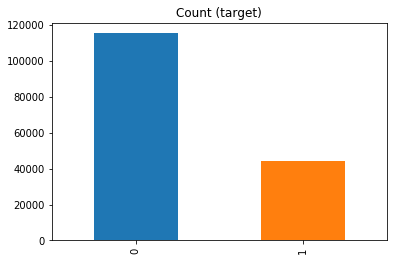

In [0]:
target_count = y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1') 

target_count.plot(kind='bar', title='Count (target)'); #EDA to show the proportion of Class 0 to Class 1

In [0]:
import imblearn #Importing imbalanced learn module
import matplotlib.pyplot as plt

In [0]:

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

###To show the effect of the Random Under Sampling, the before and after graphs are plotted.

Since the dataset has many dimensions (features) and  graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA)

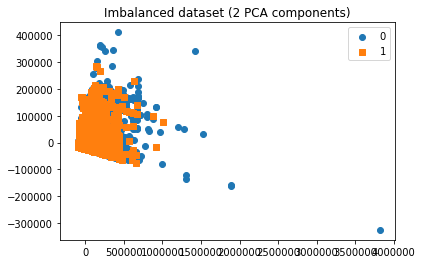

In [0]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
L = pca.fit_transform(x)

plot_2d_space(L, y, 'Imbalanced dataset (2 PCA components)')

Removed indexes: [ 65983    601 134042 ... 159588 159589 159591]


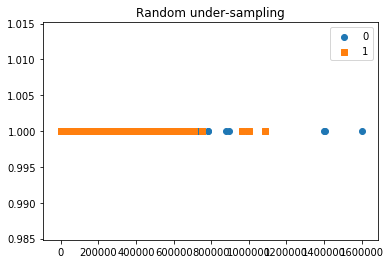

In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(x, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

#Applying the model to new features

Now that the dataset has been balanced, the model can be tested

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rus, y_rus, test_size=0.3, random_state=5)

In [0]:
clf_best.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [0]:
pred = clf_best.predict(X_test1)

In [0]:
print(classification_report(y_test1,pred))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56     13311
           1       0.58      0.65      0.61     13265

   micro avg       0.59      0.59      0.59     26576
   macro avg       0.59      0.59      0.59     26576
weighted avg       0.59      0.59      0.59     26576



#Building the Second and Final Model

Apply PCA and Random Under Sampling to the features

In [0]:
# create pca
Pca = PCA(n_components=5)

In [0]:
# fit the data to the model
principalComponents = Pca.fit_transform(x)

In [0]:
# create dataframe containing principal components
df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [0]:
# display principal components
df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-14830.643464,12047.710186,1305.025716,-49.274240,-82.005372
1,-18705.001819,24935.042966,532.550589,-19.118926,20.211693
2,-37609.140777,38152.821468,-420.612960,-10.238476,-58.070363
3,-55781.553936,3123.791589,-296.744864,-6.033344,-93.987107
4,-57596.765852,-17299.762590,-669.911330,11.054607,5.435740


Removed indexes: [ 65983    601 134042 ... 159588 159589 159591]


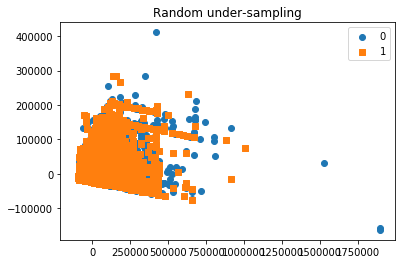

In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
rus_X, rus_y, rus_id = rus.fit_sample(df, y)

print('Removed indexes:', id_rus)

plot_2d_space(rus_X, rus_y, 'Random under-sampling')

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(rus_X, rus_y, test_size=0.3, random_state=5)

In [0]:
clf_rand = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 4, cv = 3, verbose=2, random_state=5, n_jobs = -1)
# Fit the random search model
clf_rand.fit(X_train2,y_train2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 43.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=4, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [0]:
clf_rand.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [0]:
best_clf = RandomForestClassifier(bootstrap= False,
 max_depth = 10,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators= 1000,
  random_state =5)

In [0]:
best_clf.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [0]:
preds = clf_best.predict(X_test2)

In [0]:
print(classification_report(y_test2,pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.58     13311
           1       0.59      0.66      0.62     13265

   micro avg       0.60      0.60      0.60     26576
   macro avg       0.60      0.60      0.60     26576
weighted avg       0.60      0.60      0.60     26576



#As can be seen, the last model that was built for the PCA and RandomUnderSampling performed best. 

In fact, it even performed better than the Neural Network